In [1]:
#importing all of the libraries that will be needed
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
from IPython.display import display, HTML

In [2]:
# Inserting some images that is related to the assignment topic

# Paths to my image files
image_paths = ['11.jpg', '12.jpg', '13.jpg']

# Generate HTML code to display images side by side
images_html = ''.join([f'<img src="{path}" style="width: 310px; margin: 0px; float: left;" />' for path in image_paths])

# Display HTML code
display(HTML(images_html))

In [3]:
#Read files from the URL into the pandas DataFrame
# make sure to reference where you got the dataswt (CSO - Tourism)
url = "dftravel.csv"
df = pd.read_csv(url) 

## Where did Ireland's Tourists Come From? Cleaning and Preperation
This section will aim use data preperation methods such a `.head()` , `.shape`, `describe`, `info.()` etc to clean and sort the data first

In [4]:
# is there an increase in certain countries? Let's experiment 
# which countries spent the most money, are they increasling spending money YoY
# how much money can ireland expect in 2024/2025 : ML

#Using .head() to get a sense for the data, its structure and content
df.head()

,STATISTIC Label,Year,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010,January,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,2010,January,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,2010,January,Belgium,Arrivals,Thousand,12.5


In [5]:
# To get the data types of all columns:
all_columns_dtypes = df.dtypes
print("Data types of all columns:")
print(all_columns_dtypes)


Data types of all columns:
STATISTIC Label     object
Year                 int64
Month               object
Country             object
Direction           object
UNIT                object
VALUE              float64
dtype: object


In [6]:
df.shape

(6084, 7)

In [7]:
# Count occurrences of "thousand" in the 'UNIT' feature. If 100% of data in this unit is thousand we will drop the column
#Reason for this is it is ir
#thousand_count = (df['UNIT'] == 'Thousand').sum()

# Calculating total number of observations
#total_rows = len(df)

# Calculate percentage of times out of 100 that 'Thousand' was the unit of measurement 
#percentage_thousand = (thousand_count / total_rows) * 100

#print("Percentage of 'thousand' in the 'UNIT' column:", percentage_thousand)

# for report - need reference 
#it's perfectly fine to drop a column if it contains the exact same value for all rows in the DataFrame, especially if that value doesn't provide any additional information beyond what's already known or can be communicated through metadata or other means.
#In your case, if the 'UNIT' column contains the same value ('thousands') for all rows and this information is already conveyed to the reader or user of the data, there's no need to keep that column in the DataFrame. You can safely drop it to simplify the structure of your DataFrame and make it more efficient.
#Dropping such redundant columns can improve the clarity and efficiency of your data analysis and visualization processes


In [8]:
#another way to do the above is to run a .decribe with objects to see how many unique data is in each column
# Summary statistics for categorical columns
print(df.describe(include=['object']))

#here i can see unit only has one piece of data and that is thousand 

           STATISTIC Label    Month        Country Direction      UNIT
count                 6084     6084           6084      6084      6084
unique                   1       12             18         2         1
top     Air and Sea Travel  January  Great Britain  Arrivals  Thousand
freq                  6084      540            338      3042      6084


In [9]:
# Drop the 'UNIT' column
#df.drop(columns=['UNIT'], inplace=True)

In [10]:
# only keep the observations that are arrivals
df = df[df['Direction'] == 'Arrivals']

In [11]:
# check to see the head 
df.head()

,STATISTIC Label,Year,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,Thousand,361.5
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,Thousand,0.9
4,Air and Sea Travel,2010,January,Belgium,Arrivals,Thousand,12.5
6,Air and Sea Travel,2010,January,Germany,Arrivals,Thousand,45.3
8,Air and Sea Travel,2010,January,Spain,Arrivals,Thousand,68.6


In [12]:
df.describe()
# because only value and year is an integer type (float) I am only returned with two coulmn of data for my statistical analsis 

,Year,VALUE
count,3042.000000,3040.000000
mean,2016.544379,136.478717
std,4.060805,316.040078
min,2010.000000,0.000000
25%,2013.000000,12.800000
50%,2017.000000,36.000000
75%,2020.000000,85.900000
max,2024.000000,2270.700000


In [13]:
# i need to scale this becuase its single to thousands , theres mulitple different magnitudes
#wait till the end to see if it improves result by scaling 
#info in week 18th march

## Clean the data

In [14]:
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              2
dtype: int64

In [15]:
mean_value = df[('VALUE')].mean()

# Fill NaN values with the mean of VALUE - give reference in report as to why this is important
df[('VALUE')].fillna(mean_value, inplace=True)

In [16]:
# Now my dataset is clean and there are no NaN, mal or missing values
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              0
dtype: int64

## Where did Ireland's Tourists Come From? Comparative analysis 2010,2016,2023
## Data Visualisation

In [17]:
import pandas as pd

# Filter the DataFrame for the desired year (e.g., 2023) and exclude 'all countries'
df_23_filtered = df[df['Year'] == 2023]
df_23_filtered = df_23_filtered[~df_23_filtered['Country'].str.contains('all countries', case=False)]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_23_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_23 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_23)


                                              Country  Percentage of Visitors
0                                             Belgium                1.241607
1                                              France                6.866410
2                                             Germany                4.899522
3                                       Great Britain               34.992849
4                                               Italy                4.894190
5                                         Netherlands                3.529925
6                                 Other Countries(42)                2.272320
7                                   Other Europe (34)                0.997261
8                    Other Transatlantic Countries(1)                1.229486
9                                        Other UK (1)                0.164352
10                                             Poland                2.523453
11                                           Portugal           

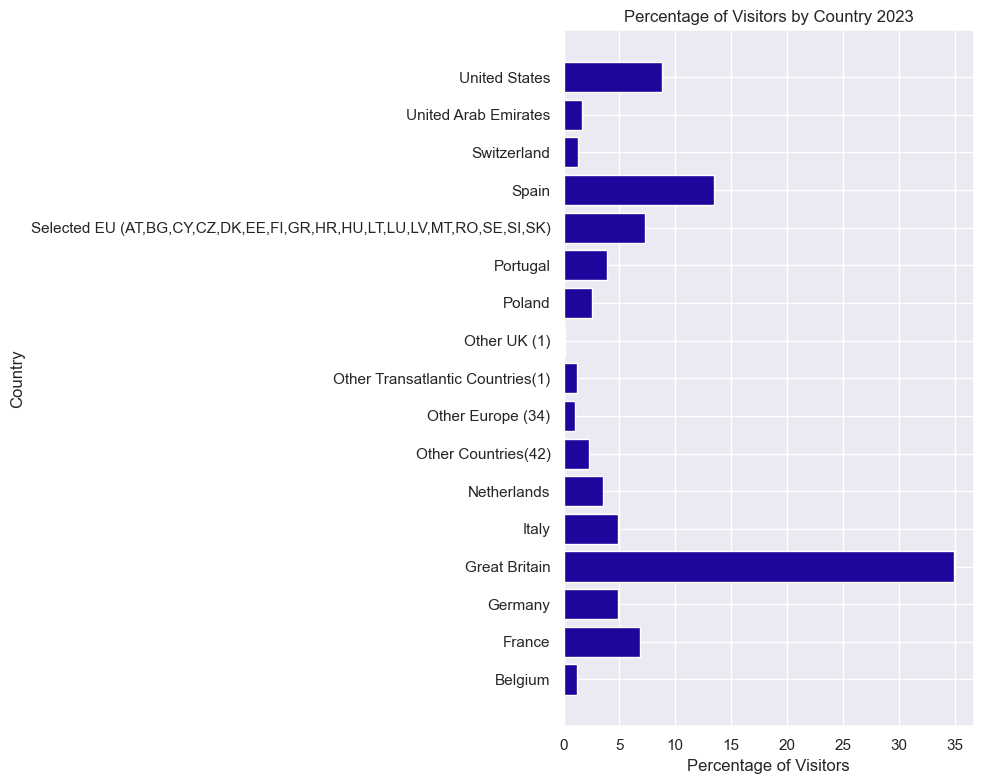

In [18]:
# removing all countries as skews data
df_filtered = result_df_23[result_df_23['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'] , color='#1e059c')
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2023')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Filter the DataFrame for the desired year (e.g., 2023) and exclude 'all countries'
df_16_filtered = df[df['Year'] == 2016]
df_16_filtered = df_16_filtered[~df_16_filtered['Country'].str.contains('all countries', case=False)]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_16_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_16 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_16)


                                              Country  Percentage of Visitors
0                                             Belgium                1.441323
1                                              France                6.415514
2                                             Germany                5.663197
3                                       Great Britain               42.575788
4                                               Italy                3.722801
5                                         Netherlands                3.511193
6                                 Other Countries(42)                0.746043
7                                   Other Europe (34)                0.760873
8                    Other Transatlantic Countries(1)                0.969057
9                                        Other UK (1)                0.187652
10                                             Poland                3.007557
11                                           Portugal           

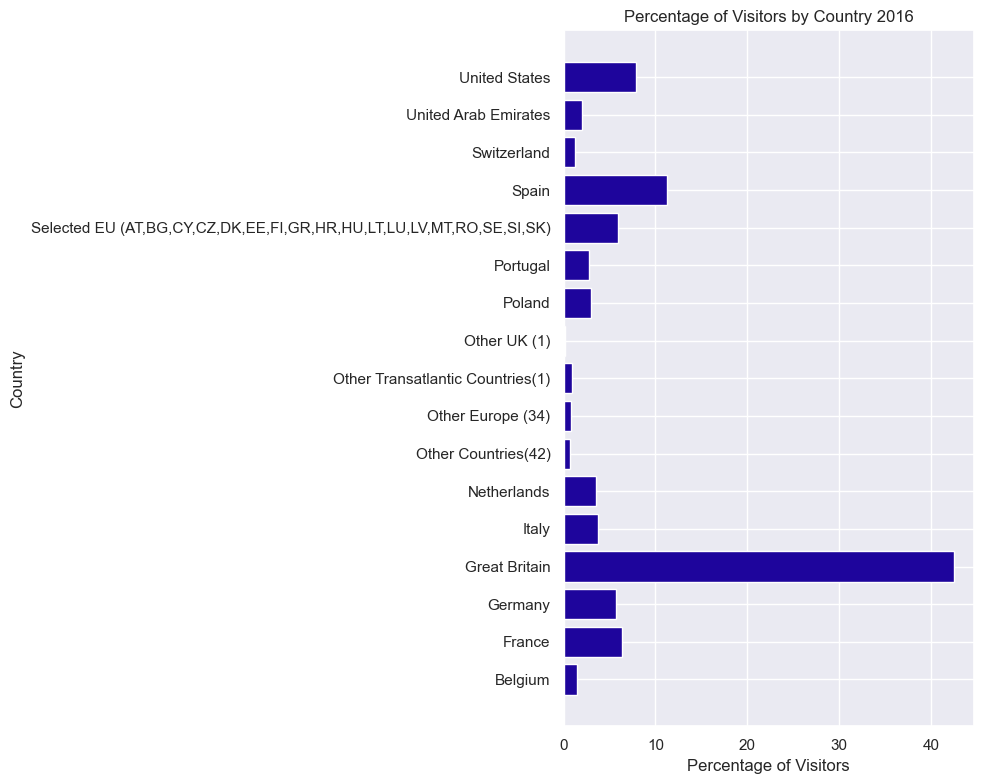

In [20]:
# removing all countries as skews data
df_filtered = result_df_16[result_df_16['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='#1e059c',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2016')
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Filter the DataFrame for the desired year (e.g., 2023) and exclude 'all countries'
df_10_filtered = df[df['Year'] == 2010]
df_10_filtered = df_10_filtered[~df_10_filtered['Country'].str.contains('all countries', case=False)]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_10_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_10 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_10)


                                              Country  Percentage of Visitors
0                                             Belgium                1.257130
1                                              France                7.320344
2                                             Germany                5.179656
3                                       Great Britain               47.173394
4                                               Italy                3.521050
5                                         Netherlands                2.583240
6                                 Other Countries(42)                0.953311
7                                   Other Europe (34)                0.547185
8                    Other Transatlantic Countries(1)                0.337922
9                                        Other UK (1)                0.204613
10                                             Poland                3.755115
11                                           Portugal           

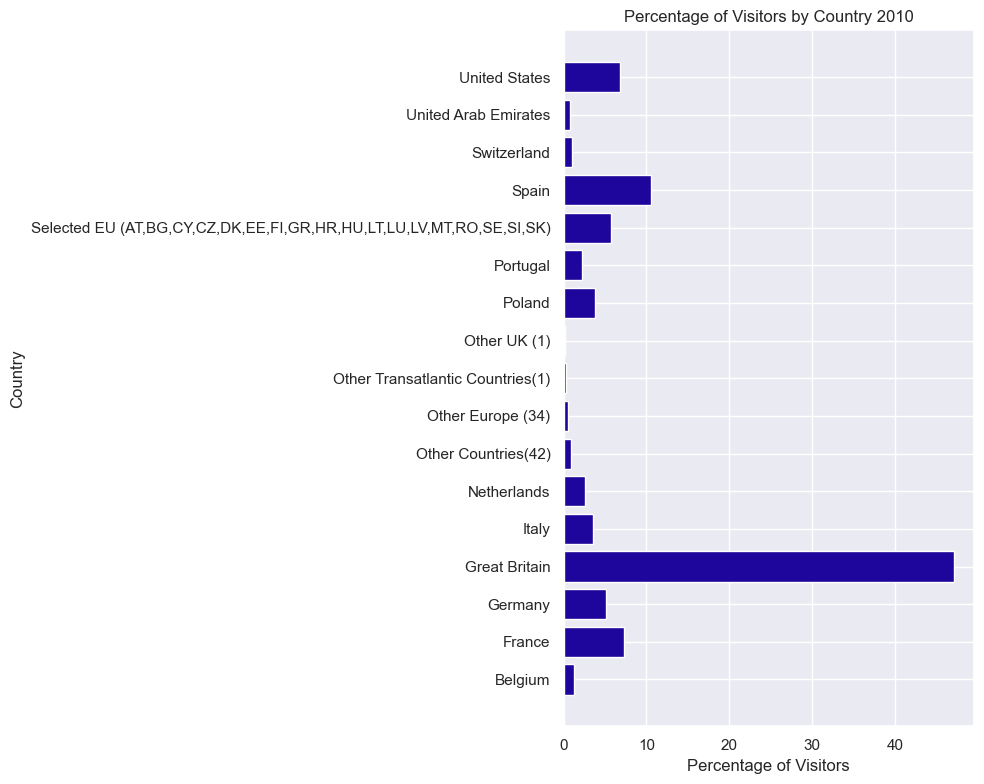

In [22]:
# removing all countries as skews data
df_filtered = result_df_10[result_df_10['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='#1e059c',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2010')
plt.tight_layout()
plt.show()

In [23]:
# Filter out the rows with 'All countries'
df_filtered = df[df['Country'] != 'All countries']

# Group by country and sum the values
country_totals = df_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total value of all countries
total_value_all_countries = country_totals.sum()

# Calculate the percentage of total value for each country
country_percentages = (country_totals / total_value_all_countries) * 100

# Sort the countries by percentage in descending order and select the top 5
top_5_countries = country_percentages.nlargest(5)

# Display the top 5 countries along with their percentages of total value
for country, percentage in top_5_countries.items():
    print(f"Country: {country}, Percentage of Total Value: {percentage:.2f}%")


Country: Great Britain, Percentage of Total Value: 40.82%
Country: Spain, Percentage of Total Value: 11.52%
Country: United States, Percentage of Total Value: 8.05%
Country: France, Percentage of Total Value: 6.59%
Country: Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK), Percentage of Total Value: 6.49%


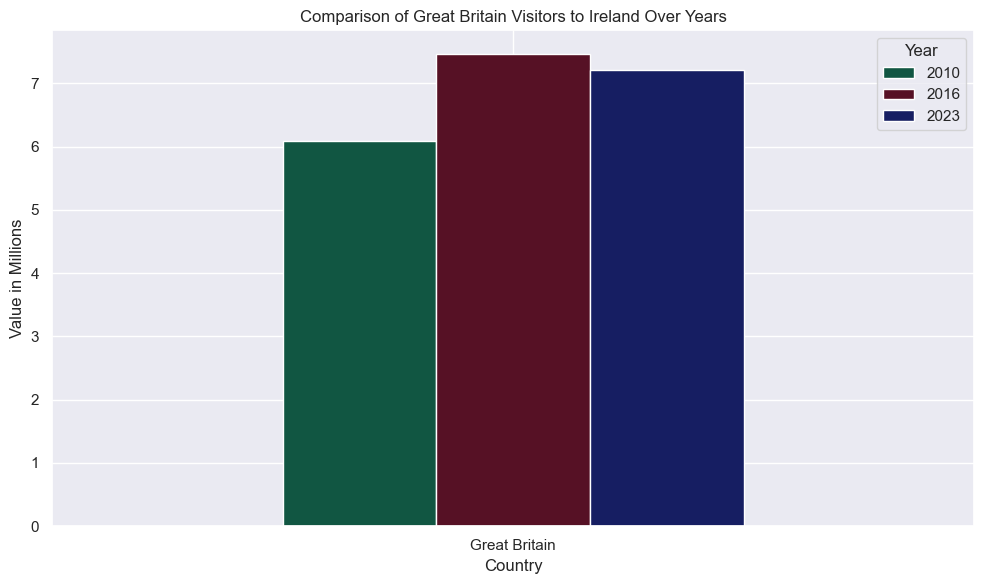

In [24]:
# Remove 'all countries' from the 'Country' column
years = [2010, 2016, 2023]

df_filtered_gb = df_filtered[(df_filtered['Year'].isin(years)) & (df_filtered['Country'] == 'Great Britain')]


colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered_gb.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


C:\Users\coreyhughes\AppData\Local\Temp\ipykernel_12664\563462199.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_spain = df_filtered[(df_filtered['Year'].isin(years)) & (df_filtered['Country'] == 'Spain') & (df['Country'] != 'all countries')]


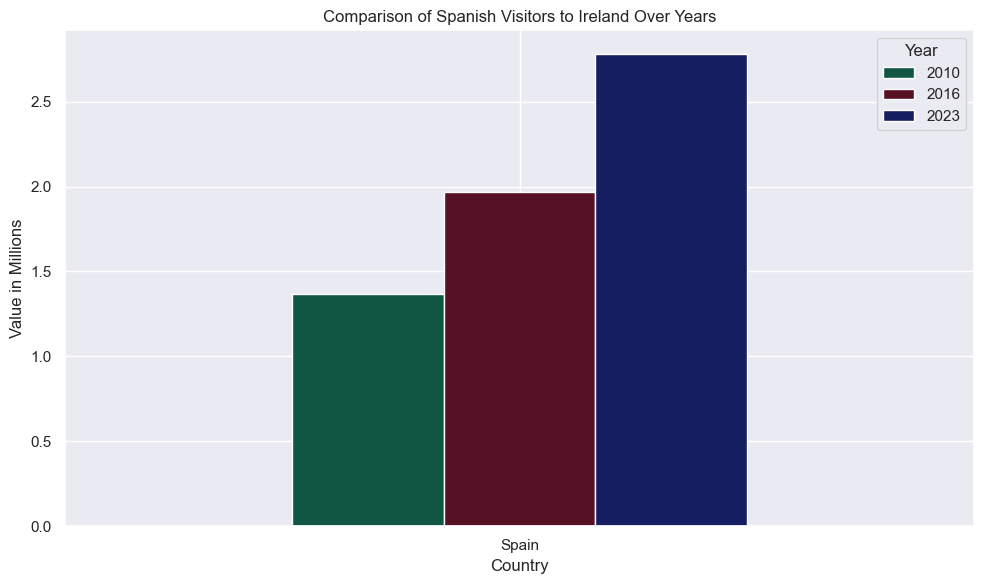

In [25]:
years = [2010, 2016, 2023]

# Remove 'all countries' from the 'Country' column
df_filtered_spain = df_filtered[(df_filtered['Year'].isin(years)) & (df_filtered['Country'] == 'Spain') & (df['Country'] != 'all countries')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered_spain.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of Spanish Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


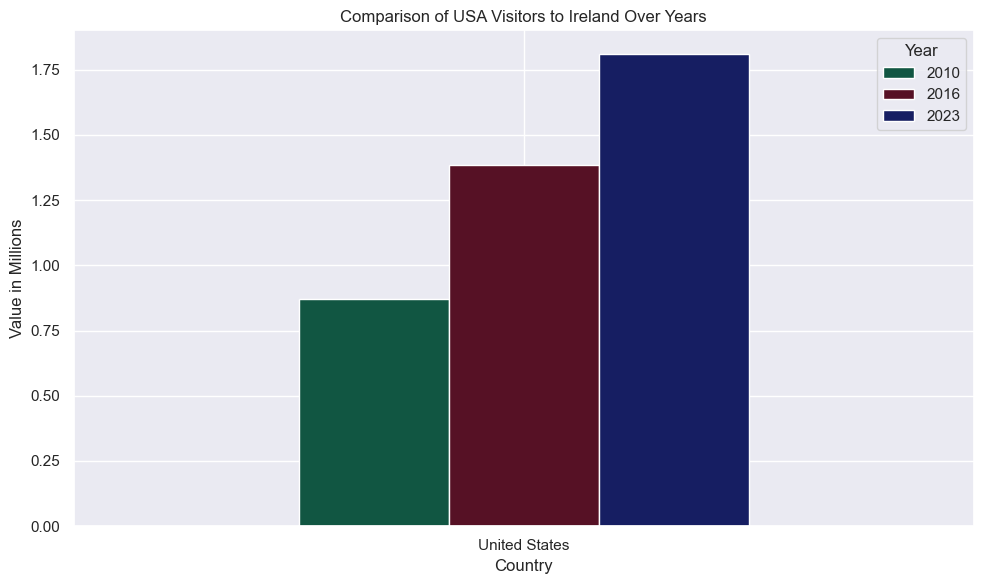

In [26]:
years = [2010, 2016, 2023]

# Remove 'all countries' from the 'Country' column
df_filtered_usa = df_filtered[(df_filtered['Year'].isin(years)) & (df_filtered['Country'] == 'United States')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered_usa.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of USA Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


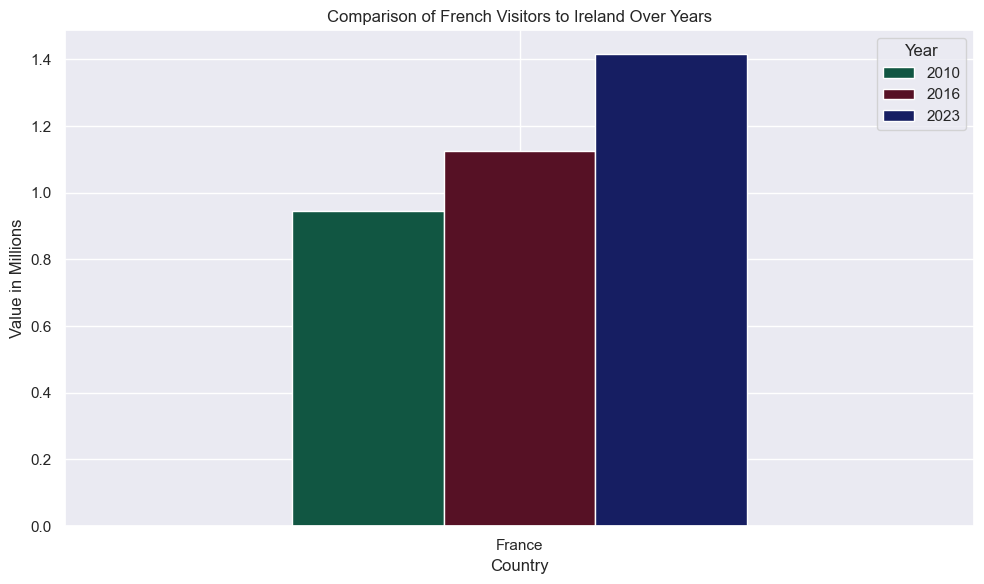

In [27]:
years = [2010, 2016, 2023]

# Remove 'all countries' from the 'Country' column
df_filtered_fr = df_filtered[(df_filtered['Year'].isin(years)) & (df_filtered['Country'] == 'France')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered_fr.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of French Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [28]:
# Create a function so I can check the % increase on any country for any year 

def calculate_percentage_change(df_filtered, country_of_interest, initial_year, final_year):
    df_initial = df_filtered[(df_filtered['Year'] == initial_year) & (df_filtered['Country'] == country_of_interest)]
    total_visitors_initial = df_initial['VALUE'].sum()

    # Filter the DataFrame for the final year and calculate the total number of tourists visiting the specified country
    df_final = df_filtered[(df_filtered['Year'] == final_year) & (df_filtered['Country'] == country_of_interest)]
    total_visitors_final = df_final['VALUE'].sum()

    # Calculate the percentage change in tourists visiting the specified country
    percentage_change = ((total_visitors_final - total_visitors_initial) / total_visitors_initial) * 100

    return percentage_change

In [29]:
# Call the function here to check on country % of tourist increase or decrease through a range of years

country_of_interest = 'Germany'
initial_year = 2013
final_year = 2023
percentage_change_spain = calculate_percentage_change(df, country_of_interest, initial_year, final_year)
print(f"Percentage change in tourists visiting {country_of_interest} from {initial_year} to {final_year}: {percentage_change_spain:.2f}%")


Percentage change in tourists visiting Germany from 2013 to 2023: 34.25%


## Decriptive Statistics

In [31]:
# Create an empty dictionary to store the sums for each year
sums_per_year = {}

# Iterate over each year from 2010 to 2023
for year in range(2010, 2024):
    # Filter the DataFrame for the current year and exclude the specified country
    year_data = df_filtered[(df_filtered['Year'] == year)]
    
    # Calculate the sum of the 'VALUE' column for the current year
    sum_value_year = year_data['VALUE'].sum() / 1000
    
    # Store the sum in the dictionary with the year as the key
    sums_per_year[year] = round(sum_value_year, 2)

# Print the sums for each year
for year, sum_value_year in sums_per_year.items():
    print(f"Sum of tourists visiting for the year {year}: {sum_value_year} million")


Sum of tourists visiting for the year 2010: 12.9 million
Sum of tourists visiting for the year 2011: 13.05 million
Sum of tourists visiting for the year 2012: 13.14 million
Sum of tourists visiting for the year 2013: 13.63 million
Sum of tourists visiting for the year 2014: 14.55 million
Sum of tourists visiting for the year 2015: 16.1 million
Sum of tourists visiting for the year 2016: 17.53 million
Sum of tourists visiting for the year 2017: 18.4 million
Sum of tourists visiting for the year 2018: 19.4 million
Sum of tourists visiting for the year 2019: 20.14 million
Sum of tourists visiting for the year 2020: 4.46 million
Sum of tourists visiting for the year 2021: 5.23 million
Sum of tourists visiting for the year 2022: 17.26 million
Sum of tourists visiting for the year 2023: 20.63 million


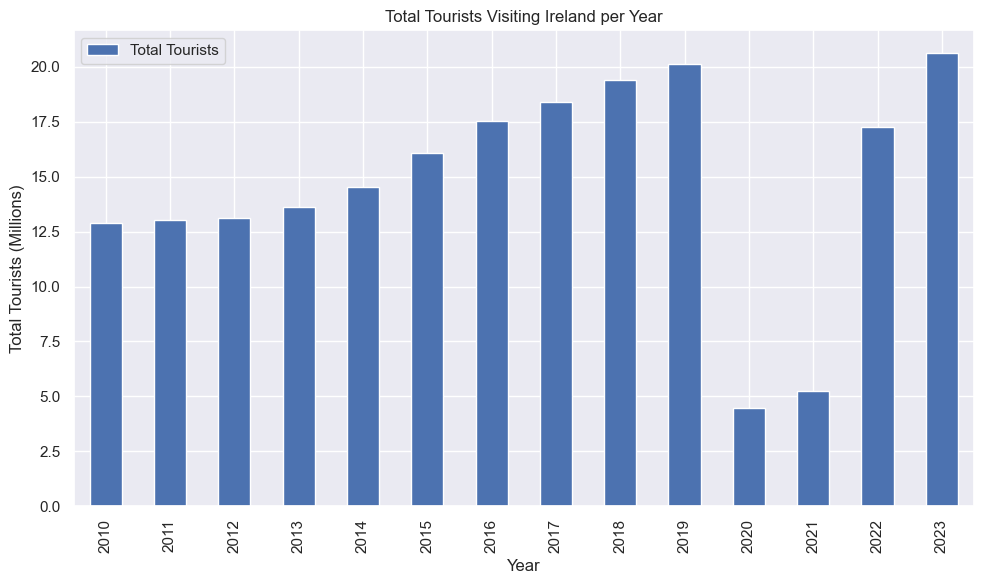

In [32]:
# Filter out rows with 'all countries' in the 'Country' column
#df_filtered = df[df['Country'] != 'All countries']

# Convert the dictionary to a DataFrame
sums_per_year_df = pd.DataFrame(list(sums_per_year.items()), columns=['Year', 'Total Tourists'])

# Convert the values to millions
sums_per_year_df['Total Tourists'] 

# Plot total tourists per year
sums_per_year_df.plot(kind='bar', x='Year', y='Total Tourists', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Tourists (Millions)')
plt.title('Total Tourists Visiting Ireland per Year')
plt.tight_layout()
plt.show()


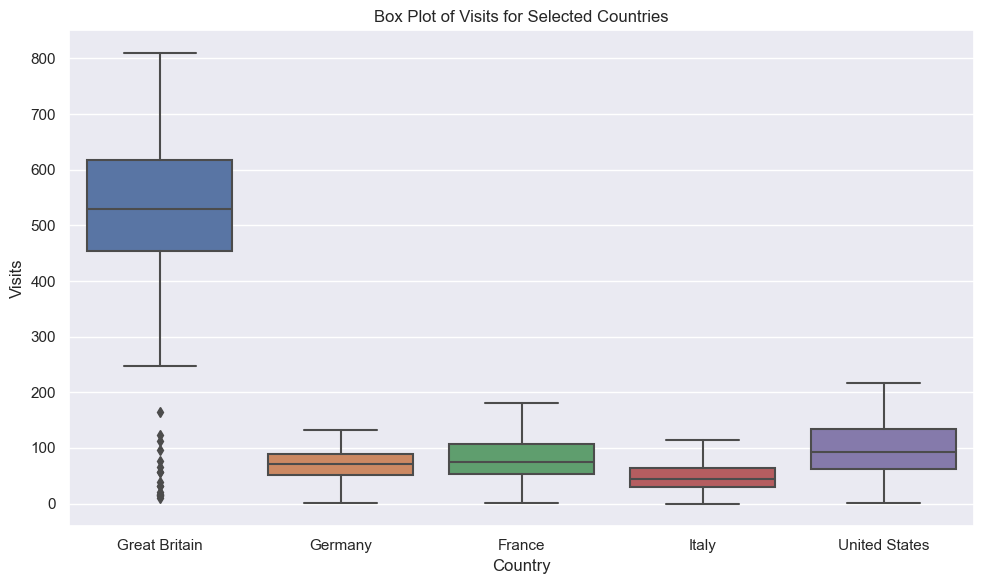

In [33]:
# Assuming your DataFrame is named 'df' and contains columns 'Country' and 'Visits'
df_boxplot = pd.DataFrame(df_filtered)

# Filter out rows with 'all countries' in the 'Country' column
df_filtered_bp = df_boxplot[df_boxplot['Country'] != 'all countries']

# Filter the DataFrame for specified countries
countries_of_interest = ['France', 'Italy', 'Germany', 'United States', 'Great Britain']
df_interest = df_filtered_bp[df_filtered_bp['Country'].isin(countries_of_interest)]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='VALUE', data=df_interest)
plt.title('Box Plot of Visits for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Visits')
plt.tight_layout()
plt.show()


In [34]:
from scipy.stats import skew

# Assuming your DataFrame is named 'df' and contains columns 'Country' and 'VALUE'
countries_of_interest = ['France', 'Italy', 'Germany', 'United States', 'Great Britain']

for country in countries_of_interest:
    country_data = df_filtered[df_filtered['Country'] == country]['VALUE']
    skewness = skew(country_data)
    print(f"Skewness for {country}: {skewness}")


Skewness for France: 0.12053949334279661
Skewness for Italy: 0.3187413149828739
Skewness for Germany: -0.39048134504303805
Skewness for United States: 0.24496680439378185
Skewness for Great Britain: -1.1284622576124754


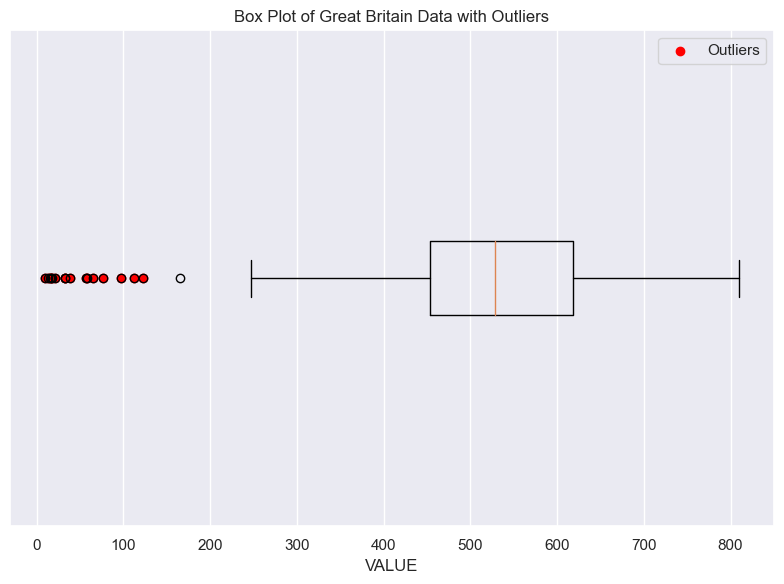

In [35]:
from scipy.stats import zscore

great_britain_data = df_filtered[df_filtered['Country'] == 'Great Britain']['VALUE']

# Calculate Z-scores for Great Britain data
z_scores = zscore(great_britain_data)

# Define threshold for outlier detection (e.g., Z-score > 2)
threshold = 2

# Filter outliers based on threshold
outliers = great_britain_data[abs(z_scores) > threshold]

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(great_britain_data, vert=False)
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
plt.title('Box Plot of Great Britain Data with Outliers')
plt.xlabel('VALUE')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

# explain why its important that i identified the outliers 


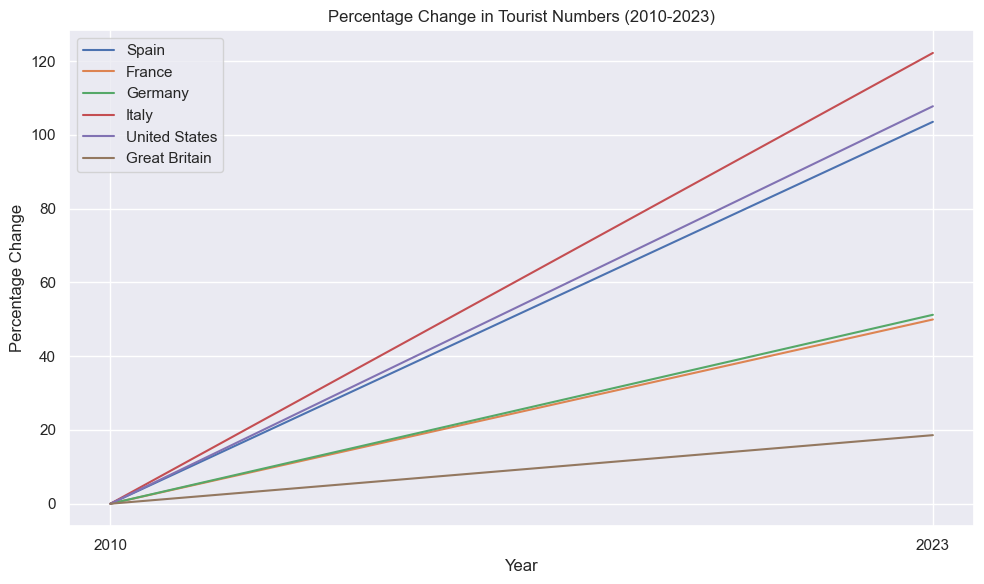

In [36]:

def calculate_percentage_change(df_filtered, country_of_interest, initial_year, final_year):
    # Filter the DataFrame for the initial year and calculate the total number of tourists visiting the specified country
    df_initial = df_filtered[(df_filtered['Year'] == initial_year) & (df_filtered['Country'] == country_of_interest)]
    total_visitors_initial = df_initial['VALUE'].sum()

    # Filter the DataFrame for the final year and calculate the total number of tourists visiting the specified country
    df_final = df_filtered[(df_filtered['Year'] == final_year) & (df_filtered['Country'] == country_of_interest)]
    total_visitors_final = df_final['VALUE'].sum()

    # Calculate the percentage change in tourists visiting the specified country
    percentage_change = ((total_visitors_final - total_visitors_initial) / total_visitors_initial) * 100

    return percentage_change

# List of countries to analyze
countries_of_interest = ['Spain', 'France', 'Germany', 'Italy', 'United States', 'Great Britain']

# Years for analysis
initial_year = 2010
final_year = 2023

# Calculate percentage change for each country
percentage_changes = {}
for country in countries_of_interest:
    percentage_changes[country] = calculate_percentage_change(df, country, initial_year, final_year)

# Plotting
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    plt.plot([initial_year, final_year], [0, percentage_changes[country]], label=country)

plt.title('Percentage Change in Tourist Numbers (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks([initial_year, final_year])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Normal Distribution

In [99]:
url = "temp.csv"
temp = pd.read_csv(url) 

In [100]:
temp.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C02431V02938,Meteorological Weather Station,UNIT,VALUE
0,MTM02C1,Average Maximum Temperature,195801,1958M01,1,Belmullet,Degrees C,8.2
1,MTM02C1,Average Maximum Temperature,195801,1958M01,2,Birr,Degrees C,7.8
2,MTM02C1,Average Maximum Temperature,195801,1958M01,3,Valentia Observatory,Degrees C,9.7
3,MTM02C1,Average Maximum Temperature,195801,1958M01,4,Casement,Degrees C,NaN
4,MTM02C1,Average Maximum Temperature,195801,1958M01,5,Claremorris,Degrees C,7.4


In [101]:
import pandas as pd

temp_new = pd.DataFrame(temp)

# Extract year and month from the 'Month' column using regular expressions
temp_new[['Year', 'Month_Num']] = temp_new['Month'].str.extract(r'(\d{4})M(\d{2})')

# Map month numbers to month names
month_mapping = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# Convert numeric month values to month names
temp_new['Month'] = temp_new['Month_Num'].map(month_mapping)

# Drop the 'Month_Num' column if not needed
temp_new.drop(columns=['TLIST(M1)', 'Month'], inplace=True)

print(temp_new)


      STATISTIC              Statistic Label  C02431V02938  \
0       MTM02C1  Average Maximum Temperature             1   
1       MTM02C1  Average Maximum Temperature             2   
2       MTM02C1  Average Maximum Temperature             3   
3       MTM02C1  Average Maximum Temperature             4   
4       MTM02C1  Average Maximum Temperature             5   
...         ...                          ...           ...   
58495   MTM02C5           Lowest Temperature            11   
58496   MTM02C5           Lowest Temperature            12   
58497   MTM02C5           Lowest Temperature            13   
58498   MTM02C5           Lowest Temperature            14   
58499   MTM02C5           Lowest Temperature            15   

      Meteorological Weather Station       UNIT  VALUE  Year Month_Num  
0                          Belmullet  Degrees C    8.2  1958        01  
1                               Birr  Degrees C    7.8  1958        01  
2               Valentia Observatory

In [102]:
temp_new.isnull().sum()

STATISTIC                            0
Statistic Label                      0
C02431V02938                         0
Meteorological Weather Station       0
UNIT                                 0
VALUE                             8145
Year                                 0
Month_Num                            0
dtype: int64

In [103]:
mean_value = temp_new[('VALUE')].mean()

# Fill NaN values with the mean of VALUE - give reference in report as to why this is important
temp_new[('VALUE')].fillna(mean_value, inplace=True)

In [104]:
temp_new.isnull().sum()

STATISTIC                         0
Statistic Label                   0
C02431V02938                      0
Meteorological Weather Station    0
UNIT                              0
VALUE                             0
Year                              0
Month_Num                         0
dtype: int64

,Year,Month_Num,temp
0,2010,01,4.875116
1,2010,02,5.339116
2,2010,03,6.957783
3,2010,04,9.129783
4,2010,05,10.797783
5,2010,06,13.041783
6,2010,07,13.563116
7,2010,08,12.552449
8,2010,09,12.339116
9,2010,10,10.063116


In [106]:
# Dictionary mapping month numbers to month names
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# Replace month numbers with month names
temp_new['Month'] = temp_new['Month_Num'].map(month_names)

# Drop the 'Month_Num' column if no longer needed
temp_new.drop(columns=['Month_Num'], inplace=True)

# Display the updated DataFrame
print(temp_new)


      STATISTIC              Statistic Label  C02431V02938  \
0       MTM02C1  Average Maximum Temperature             1   
1       MTM02C1  Average Maximum Temperature             2   
2       MTM02C1  Average Maximum Temperature             3   
3       MTM02C1  Average Maximum Temperature             4   
4       MTM02C1  Average Maximum Temperature             5   
...         ...                          ...           ...   
58495   MTM02C5           Lowest Temperature            11   
58496   MTM02C5           Lowest Temperature            12   
58497   MTM02C5           Lowest Temperature            13   
58498   MTM02C5           Lowest Temperature            14   
58499   MTM02C5           Lowest Temperature            15   

      Meteorological Weather Station       UNIT     VALUE  Year     Month  
0                          Belmullet  Degrees C  8.200000  1958   January  
1                               Birr  Degrees C  7.800000  1958   January  
2               Valentia Ob

In [142]:
# Define the custom order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical with custom order
average_temp_per_month['Month'] = pd.Categorical(average_temp_per_month['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by 'Year' and 'Month' in chronological order
average_temp_per_month.sort_values(by=['Year', 'Month'], inplace=True)


average_temp_per_month.head(12)
#average_temp_per_month.tail(12)


,Year,Month,temp
4,2010,January,4.875116
3,2010,February,5.339116
7,2010,March,6.957783
0,2010,April,9.129783
8,2010,May,10.797783
6,2010,June,13.041783
5,2010,July,13.563116
1,2010,August,12.552449
11,2010,September,12.339116
10,2010,October,10.063116


In [114]:
# Filter the DataFrame for the month of August
august_temperatures = average_temp_per_month[average_temp_per_month['Month'] == 'August']

# Find the year with the highest temperature for August
year_highest_temperature = august_temperatures.loc[august_temperatures['temp'].idxmax(), 'Year']

print("Year with the highest temperature for August:", year_highest_temperature)


Year with the highest temperature for August: 2022


In [131]:
# Filter the DataFrame for years 2010-2022
filtered_years = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2022)]

# Group by year and month, then calculate the mean VALUE for each group
average_tourists_per_month_year = filtered_years.groupby(['Year', 'Month'])['VALUE'].mean().reset_index()

# Print the average number of tourists for each month and year
print("Average number of tourists for each month and year from January 2010 to December 2022:")
print(average_tourists_per_month_year)


Average number of tourists for each month and year from January 2010 to December 2022:
     Year      Month       VALUE
0    2010    January   45.482353
1    2010   February   47.300000
2    2010      March   58.217647
3    2010      April   53.205882
4    2010        May   65.582353
..    ...        ...         ...
151  2022     August  119.847059
152  2022  September  101.529412
153  2022    October   96.105882
154  2022   November   78.847059
155  2022   December   77.035294

[156 rows x 3 columns]


In [179]:
# Convert 'Year' column in average_temp_per_month to int64
average_temp_per_month['Year'] = average_temp_per_month['Year'].astype('int64')

# Merge average_tourists_per_month_year with average_temp_per_month on 'Year' and 'Month'
merged_df = pd.merge(average_tourists_per_month_year, average_temp_per_month[['Year', 'Month', 'temp']], on=['Year', 'Month'], how='left')

# Drop the 'Year' and 'Month' columns from the merged DataFrame
#merged_df = merged_df.drop(['Year', 'Month'], axis=1)

# Print the merged DataFrame
print(merged_df)


     Year      Month       VALUE       temp
0    2010    January   45.482353   4.875116
1    2010   February   47.300000   5.339116
2    2010      March   58.217647   6.957783
3    2010      April   53.205882   9.129783
4    2010        May   65.582353  10.797783
..    ...        ...         ...        ...
151  2022     August  119.847059  14.309783
152  2022  September  101.529412  12.317783
153  2022    October   96.105882  11.135116
154  2022   November   78.847059   9.219116
155  2022   December   77.035294   6.381783

[156 rows x 4 columns]


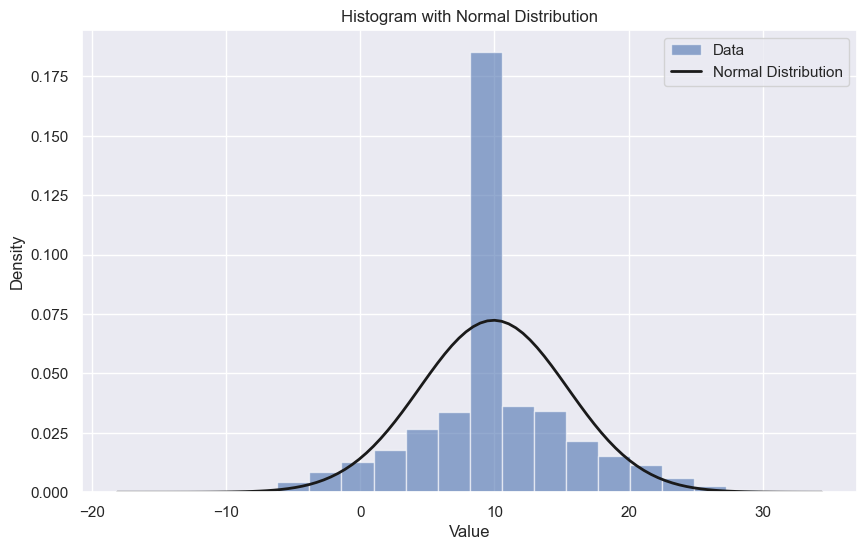

In [107]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Extract values from the DataFrame
values = temp_filtered['VALUE'].values

# Calculate mean and standard deviation
mean = np.mean(values)
std_dev = np.std(values)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, density=True, alpha=0.6, color='b', label='Data')

# Plot normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Histogram with Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# need average and standard distribution 
# find the average oer year and SD per year (2023)

#conituous variables is normal distribution

# elements like people is when you use poisson

# look this up

# i need to add continuos data to my dataset


When using the Poisson distribution to model the number of tourists arriving from various countries into Ireland, you can estimate the arrival rate (lambda) from your data and then use the Poisson distribution to simulate or make predictions about the number of arrivals.

Here's a general outline of the steps you can take:

Estimate Arrival Rate (Lambda): Calculate the average number of tourists arriving from each country into Ireland. This will serve as the arrival rate (lambda) parameter for the Poisson distribution.

Generate Simulated Data: Use the Poisson distribution to generate simulated data for the number of tourists arriving from each country. You can use the poisson.rvs() function from SciPy to generate random variates (samples) from the Poisson distribution.

Analyze and Interpret Results: Analyze the simulated data to understand the distribution of arrivals and make predictions about future arrivals. You can calculate summary statistics, visualize the data, and perform hypothesis testing or other analyses as needed.

#   Poisson

In [39]:
from scipy.stats import poisson

# Filter the DataFrame for arrivals from Germany in December 2023
december_arrivals_germany = df_filtered[(df_filtered['Country'] == 'Germany') & (df_filtered['Month'] == 'December')]

# Total number of arrivals from Germany in December 2023 (in thousands)
total_arrivals_germany_december_thousands = december_arrivals_germany['VALUE'].sum()*1000

# Calculate the mean arrival rate (per arrival) for Germany in December 2023
mean_arrival_rate_december_germany = total_arrivals_germany_december_thousands / len(december_arrivals_germany)

# Number of arrivals to calculate the probability for (k)
k = 59000

# Calculate the probability of up to k arrivals from Germany in December 2023 using the Poisson distribution SF (Survival Function)
probability = poisson.sf(k, mean_arrival_rate_december_germany)

# Convert probability to percentage
probability_percentage = probability * 100

print(f"The probability of more than {k} German visitors arriving in Ireland in December 2024 is: {probability_percentage:.6f}%")


The probability of more than 59000 German visitors arriving in Ireland in December 2024 is: 70.062288%


In [40]:
from scipy.stats import poisson

def calculate_probability(df, country, month, start_year, end_year, k):
    # Filter the DataFrame for arrivals from the specified country and month within the specified year range
    filtered_data = df[(df['Country'] == country) & 
                       (df['Month'] == month) & 
                       (df['Year'].between(start_year, end_year))]
    
    # Total number of arrivals (in thousands)
    total_arrivals_thousands = filtered_data['VALUE'].sum() * 1000
    
    # Calculate the mean arrival rate (per arrival)
    mean_arrival_rate = total_arrivals_thousands / len(filtered_data)
    
    # Calculate the probability of up to k arrivals using the Poisson distribution SF (Survival Function)
    probability = poisson.sf(k, mean_arrival_rate)
    
    # Convert probability to percentage
    probability_percentage = probability * 100
    
    return probability_percentage



In [41]:
country = 'Spain'
month = 'June'
start_year = 2010
end_year = 2023
k = 190000

probability_percentage = calculate_probability(df_filtered, country, month, start_year, end_year, k)
print(f"The probability of more than {k} {country} visitors arriving in Ireland in {month} {end_year} is: {probability_percentage:.6f}%")


The probability of more than 190000 Spain visitors arriving in Ireland in June 2023 is: 12.856488%


In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df contains your DataFrame with columns 'year' and 'value'
# Aggregate the number of tourists for each year
df_aggregated = df_filtered.groupby('Year')['VALUE'].sum().reset_index()
df_aggregated['VALUE'] /= 1000

# Prepare the data for modeling
X_train = df_aggregated[['Year']]  # Features (year)
y_train = df_aggregated['VALUE']   # Target variable (total number of tourists)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict tourists for 2025
year_2025 = [[2025]]  # Convert to 2D array as predict expects 2D array

tourists_2025 = model.predict(year_2025)
print("Predicted tourists in 2025:", tourists_2025)


Predicted tourists in 2025: [11.87417325]


C:\Users\coreyhughes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
# Assuming df contains your DataFrame with columns 'Year' and 'VALUE'
# Filter out years 2020, 2021, and 2024
df_filtered_excluded = df_filtered[~df_filtered['Year'].isin([2020, 2021, 2024])]

# Aggregate the number of tourists for each year
df_aggregated = df_filtered_excluded.groupby('Year')['VALUE'].sum().reset_index()
df_aggregated['VALUE'] /= 1000  # Convert to thousands

# Prepare the data for modeling
X_train = df_aggregated[['Year']]  # Features (year)
y_train = df_aggregated['VALUE']   # Target variable (total number of tourists)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict tourists for 2025
year_2025 = [[2025]]  # Convert to 2D array as predict expects 2D array
tourists_2025 = model.predict(year_2025)
print("Predicted tourists in 2025:", tourists_2025)


Predicted tourists in 2025: [22.04955852]


C:\Users\coreyhughes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions for the training data
y_pred_train = model.predict(X_train)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_train)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_train, y_pred_train)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1.6609960303398006
Root Mean Squared Error (RMSE): 1.2887963494438524
R-squared (R2): 0.7836445884610985


C:\Users\coreyhughes\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coreyhughes\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


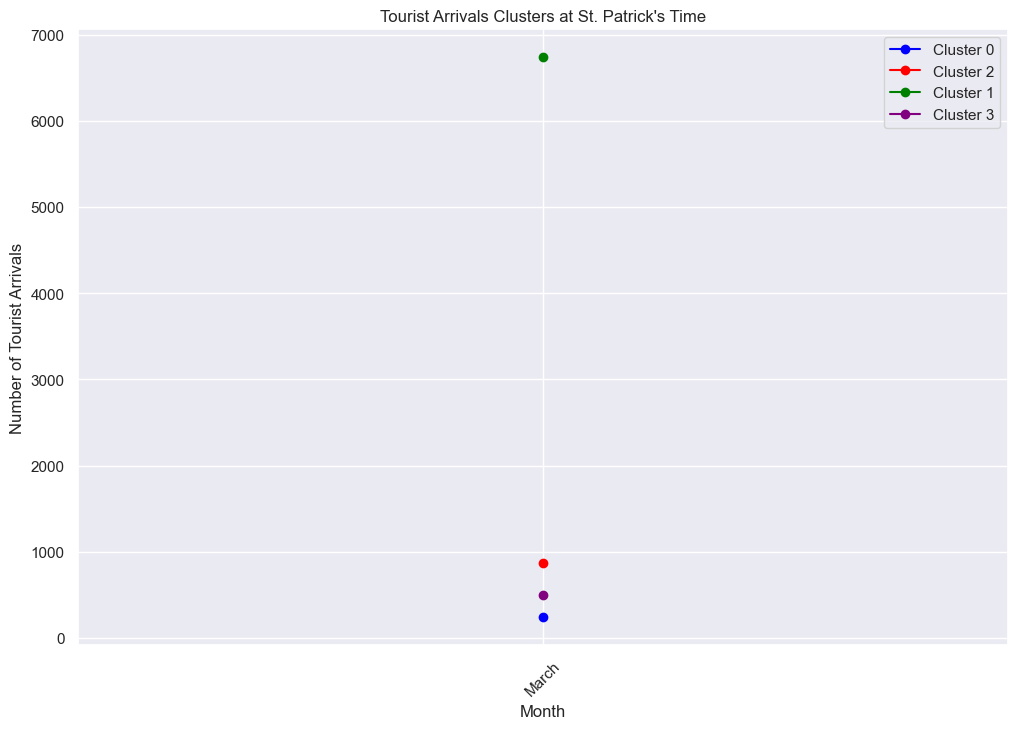

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with columns 'Country', 'Month', and 'VALUE' (tourist arrivals)
# Filter the DataFrame for St. Patrick's time (March)
march_arrivals = df_filtered[df_filtered['Month'] == 'March']

# Pivot the DataFrame to have countries as rows and months as columns, with the total number of arrivals as values
pivot_df = march_arrivals.pivot_table(index='Country', columns='Month', values='VALUE', aggfunc='sum', fill_value=0)

# Apply k-means clustering
n_clusters = 4  # Adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pivot_df)

# Add cluster labels to the DataFrame
pivot_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']  # Adjust colors if needed
for cluster in pivot_df['Cluster'].unique():
    cluster_data = pivot_df[pivot_df['Cluster'] == cluster].drop('Cluster', axis=1)
    plt.plot(cluster_data.columns, cluster_data.values[0], label=f'Cluster {cluster}', color=colors[cluster], marker='o')
plt.title('Tourist Arrivals Clusters at St. Patrick\'s Time')
plt.xlabel('Month')
plt.ylabel('Number of Tourist Arrivals')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


If one cluster has significantly higher values compared to the others, it suggests that there might be a distinct subgroup of countries with much higher tourist arrivals during St. Patrick's time. This could be due to various factors such as geographic proximity, cultural connections, or promotional campaigns targeting specific regions.

In [48]:
# Identify the cluster with the highest average tourist arrivals
cluster_with_max_arrivals = pivot_df.groupby('Cluster').mean().idxmax(axis=0)['March']

# Get the countries in the cluster with the highest average tourist arrivals
countries_in_max_cluster = pivot_df[pivot_df['Cluster'] == cluster_with_max_arrivals].index.tolist()

print("Countries with highest tourist arrivals during St. Patrick's time:")
print(countries_in_max_cluster)


Countries with highest tourist arrivals during St. Patrick's time:
['Great Britain']
